In [79]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py


plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [80]:
SRSsetting=[0,-0.5,-1,-2,-3,-5,-7,-9,-10,-13]
SRSsettingAlt=[3,1,0,-1,-2,-3,-5,-7,-9,-13]
SRSsettingAlt2=[3,2,1,0,-1,-3,-5,-7,-8,-10,-13]



In [81]:
currentMMpure=[0.9784,0.86,0.7532,0.5644,0.4204,0.231,0.1276,0.0733,0.0565,0.0273]
currentMMfilter=[0.006676,0.005844,0.005108,0.00384,0.002853,0.00157,0.000866,0.000497,0.000382,0.000185]
voltageTAfilter=[2.95,2.24,1.75,1.34,1,0.75,0.41,0.23,0.13,0.05]
bitsTAfilter=[7800,15700,26600,35100,63150,115000,205000,269000,343000,413000,457000]



In [82]:
responsitivity=0.3 #A/w
splitratio=90/10 # from BS
powerMM = np.divide(currentMMpure,responsitivity)*splitratio

In [83]:
def dBm_to_power(dBm):
    power=10**(np.divide(dBm,10))
    return power

In [84]:
powerMM

array([29.352, 25.8  , 22.596, 16.932, 12.612,  6.93 ,  3.828,  2.199,
        1.695,  0.819])

In [65]:
data_x= np.asarray(dBm_to_power(SRSsetting))
data_y=powerMM
data_y_error = np.sqrt(np.abs(data_y))

def chisquare_gaussian_beam(slope,offset):
        return chisquare_1d(function=linear,functionparams=[slope,offset],data_x=data_x,data_y=data_y,data_y_error=data_y_error)[0]


m=Minuit(chisquare_gaussian_beam, 
         slope = 1000,
         #fix_mean = "True",
         #limit_mean = (arg_maxy-20, arg_maxy+20),
         offset = 0,
         errordef = 1,
         print_level=0,
         pedantic=False)
#print('Now proceed with the fit.')
m.migrad()
#print()
#m.minos()#, if you need fancy mapping
chisquare=m.fval

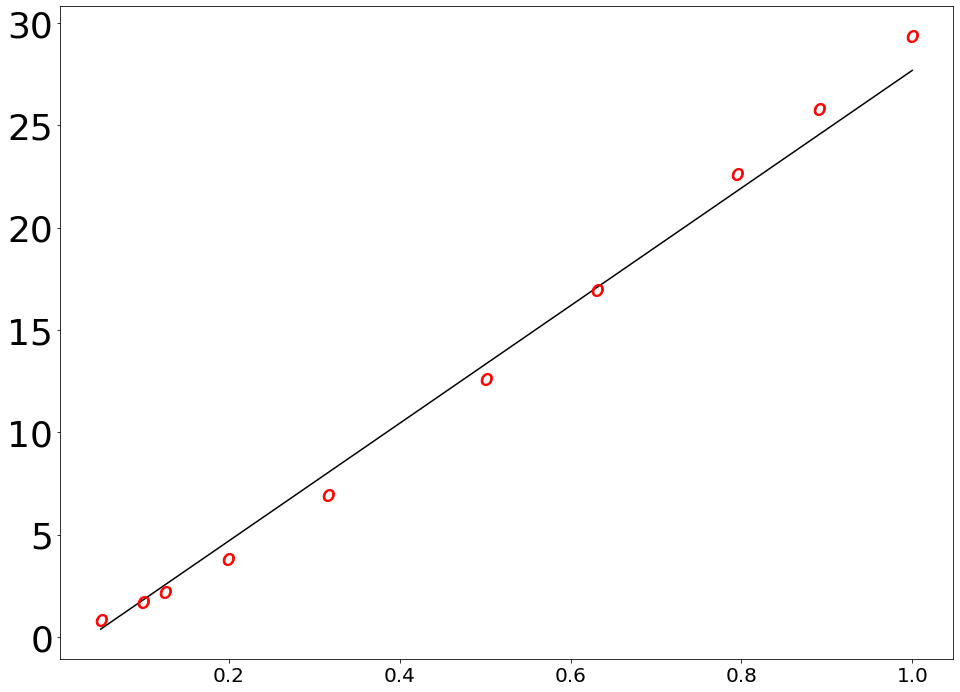

In [73]:
plt.plot(data_x,linear(data_x,params=[m.values["slope"],m.values["offset"]]),c="black")
plt.plot(data_x,data_y,linestyle="",marker="$O$",ms=12,c="r")
#plt.xscale("log")

In [ ]:
# step 1 / get Power to SRS conversion
# step 2 / get filter reduction
# step 3 / get SRS to bits conversion

# additionall get TA and filtering

In [76]:
a=  load_img_files("/data/SC_data/ImageAnalysis/zPD_modematching/Sphere_20220315/*")

/data/SC_data/ImageAnalysis/zPD_modematching/Sphere_20220315/without_sphere_dark_room.bmp 0
/data/SC_data/ImageAnalysis/zPD_modematching/Sphere_20220315/with_sphere_darkroom.bmp 1
/data/SC_data/ImageAnalysis/zPD_modematching/Sphere_20220315/with_sphere.bmp 2


In [85]:
data_x

array([1.        , 0.89125094, 0.79432823, 0.63095734, 0.50118723,
       0.31622777, 0.19952623, 0.12589254, 0.1       , 0.05011872])